# **Diabetes Prediction using Logistic Regression with Python**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib

In [ ]:
diabetesDF = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Diabetes.csv')
diabetesDF.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
corr = diabetesDF.corr()
corr

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


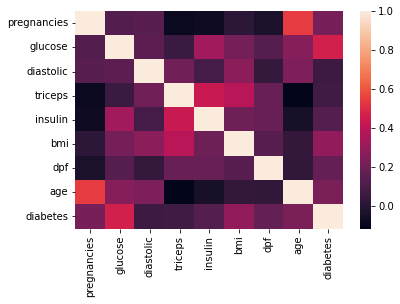

In [ ]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
#Total 768 patients record
#Using 650 data for training
# Using 100 data for testing
#Using 18 data for checking

dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

In [ ]:
#Separating label and features and converting to numpy array to feed into our model
trainLabel = np.asarray(dfTrain['diabetes'])
trainData = np.asarray(dfTrain.drop('diabetes',1))
testLabel = np.asarray(dfTest['diabetes'])
testData = np.asarray(dfTest.drop('diabetes',1))


In [ ]:
# Normalize the data 
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

# means = np.mean(trainData, axis=0)
# stds = np.std(trainData, axis=0)

In [ ]:
#Now , we will use the our training data to 
#create a bayesian classifier.

diabetesCheck = SVC()
diabetesCheck.fit(trainData, trainLabel)

#After we train our bayesian classifier , 
#we test how well it works using our test data.
accuracy = diabetesCheck.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

accuracy =  75.0 %


In [ ]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData,trainLabel)
accuracy = diabetesCheck.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

accuracy =  78.0 %


In [ ]:
coeff = list(diabetesCheck.coef_[0])
coeff

[0.44394959556732333,
 1.0548512751444092,
 -0.2427606021518405,
 -0.006363231562437049,
 -0.10298164389358887,
 0.7648583571946829,
 0.34940665172735275,
 0.12306814641990828]

In [ ]:
labels = list(dfTrain.drop('diabetes',1).columns)
labels

['pregnancies',
 'glucose',
 'diastolic',
 'triceps',
 'insulin',
 'bmi',
 'dpf',
 'age']

Text(0.5, 0, 'Importance')

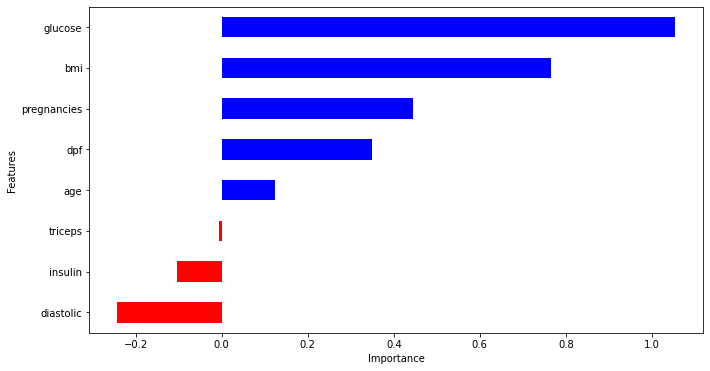

In [ ]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [ ]:
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


In [ ]:
#testing loaded model to make prediction
accuracyModel = diabetesLoadedModel.score(testData,testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


In [ ]:
dfCheck.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1


In [ ]:
sampleData = dfCheck[:1]
sampleDataFeatures = np.asarray(sampleData.drop('diabetes',1))
sampleDataFeatures

array([[  4.   , 136.   ,  70.   ,   0.   ,   0.   ,  31.2  ,   1.182,
         22.   ]])

In [ ]:
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
predictionProbab = diabetesLoadedModel.predict_proba(sampleDataFeatures)

In [ ]:
prediction

array([1])

In [ ]:
predictionProbab

array([[0., 1.]])